In [17]:
!export OE_LICENSE=/home/brent/oe_license.txt

In [18]:
from openff.toolkit import Molecule, ForceField
ff = ForceField("/home/brent/omsf/projects/valence-fitting/01_generate-forcefield/output/initial-force-field-openff-2.1.0.offxml")

Interactively prompt for lines like `t158i [*:1]-[#16X3+1:2]-[#16X2:3]-[*:4] C[S+](C)S` and compare the SMILES
in the third field against the matching parameter ID in ff defined above.

In [15]:
while (line := input()) != "q":
    pid, smirks, smiles = line.split()
    try:
        mol = Molecule.from_smiles(smiles, allow_undefined_stereo=True)
        labels = ff.label_molecules(mol.to_topology())[0]["ProperTorsions"].values()
        pids = [p.id for p in labels]
        if pid in pids:
            print("matched!")
        else:
            print(pids)
        display(mol)
    except Exception as e:
        print(e)

 t146j [C:1]1([H:31])=[N:2][C:3]([C:4]([C:5]([C:6](/[N:7]=[S:8](\[N:9]([C:10]([C:11]([C:12]([N:13]([c:14]2[n:15][c:16]([H:45])[c:17]([H:46])[c:18]([H:47])[c:19]2[H:48])[C:20]([c:21]2[c:22]([H:51])[c:23]([H:52])[c:24]([Br:25])[c:26]([H:53])[c:27]2[H:54])([H:49])[H:50])([H:43])[H:44])([H:41])[H:42])([H:39])[H:40])[H:38])[C:28]([H:55])([H:56])[H:57])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])=[C:29]([H:58])[N:30]1[H:59] (9, 8, 7, 27)


ValueError: too many values to unpack (expected 3)

In [22]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage, rdDepictor, rdMolDraw2D

def mol_to_svg(mol: Molecule, hl_atoms) -> list[str]:
    mol = mol.to_rdkit()
    rdDepictor.SetPreferCoordGen(True)
    rdDepictor.Compute2DCoords(mol)
    rdmol = rdMolDraw2D.PrepareMolForDrawing(mol)

    return MolsToGridImage(
        [rdmol],
        useSVG=True,
        highlightAtomLists=[hl_atoms],
        subImgSize=(300, 300),
        molsPerRow=1,
    )

In [14]:
while (line := input()) != "q":
    pid, smirks, smiles = line.split()
    try:
        mol = Molecule.from_smiles(smiles, allow_undefined_stereo=True)
        labels = ff.label_molecules(mol.to_topology())[0]["ProperTorsions"]
        envs = [k for k, v in labels.items() if v.id == pid]
        assert len(envs) > 0
        for env in envs:
            print(pid, mol.to_smiles(mapped=True), env)
            display(mol_to_svg(mol, env))
    except Exception as e:
        print(e)

 t146j [C:1]1([H:31])=[N:2][C:3]([C:4]([C:5]([C:6](/[N:7]=[S:8](\[N:9]([C:10]([C:11]([C:12]([N:13]([c:14]2[n:15][c:16]([H:45])[c:17]([H:46])[c:18]([H:47])[c:19]2[H:48])[C:20]([c:21]2[c:22]([H:51])[c:23]([H:52])[c:24]([Br:25])[c:26]([H:53])[c:27]2[H:54])([H:49])[H:50])([H:43])[H:44])([H:41])[H:42])([H:39])[H:40])[H:38])[C:28]([H:55])([H:56])[H:57])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])=[C:29]([H:58])[N:30]1[H:59] (9, 8, 7, 27)


ValueError: too many values to unpack (expected 3)

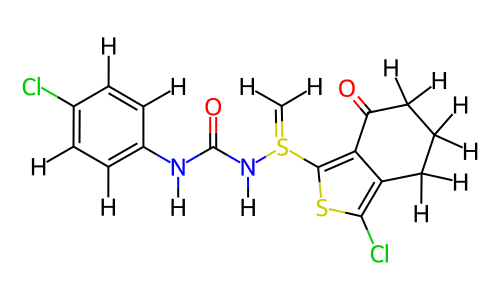

ValueError: No registered toolkits can provide the capability "assign_partial_charges" for args "()" and kwargs "{'molecule': Molecule with name '' and SMILES '[H]c1c(c(c(c(c1N([H])C(=O)N([H])S(=C([H])[H])C2=C3C(=C(S2)Cl)C(C(C(C3=O)([H])[H])([H])[H])([H])[H])[H])[H])Cl)[H]', 'partial_charge_method': 'am1bccelf10', 'use_conformers': None, 'strict_n_conformers': False, 'normalize_partial_charges': True, '_cls': <class 'openff.toolkit.topology.molecule.Molecule'>}"
Available toolkits are: [ToolkitWrapper around OpenEye Toolkit version 2022.1.1, ToolkitWrapper around The RDKit version 2023.03.3, ToolkitWrapper around AmberTools version 22.0, ToolkitWrapper around Built-in Toolkit version None]
 ToolkitWrapper around OpenEye Toolkit version 2022.1.1 <class 'openff.toolkit.utils.exceptions.ConformerGenerationError'> : OpenEye Omega conformer generation failed
 ToolkitWrapper around The RDKit version 2023.03.3 <class 'openff.toolkit.utils.exceptions.ChargeMethodUnavailableError'> : partial_charge_method 'am1bccelf10' is not available from RDKitToolkitWrapper. Available charge methods are ['gasteiger', 'mmff94'] 
 ToolkitWrapper around AmberTools version 22.0 <class 'openff.toolkit.utils.exceptions.ChargeMethodUnavailableError'> : partial_charge_method 'am1bccelf10' is not available from AmberToolsToolkitWrapper. Available charge methods are ['am1bcc', 'am1-mulliken', 'gasteiger'] 
 ToolkitWrapper around Built-in Toolkit version None <class 'openff.toolkit.utils.exceptions.ChargeMethodUnavailableError'> : Partial charge method "am1bccelf10"" is not supported by the Built-in toolkit. Available charge methods are ['zeros', 'formal_charge']


In [13]:
import os

os.environ["OE_LICENSE"] = "/home/brent/oe_license.txt"

from openff.toolkit import Molecule
from openff.toolkit.utils import OpenEyeToolkitWrapper, toolkit_registry_manager, ToolkitRegistry

def m(s): return Molecule.from_mapped_smiles(s, allow_undefined_stereo=True)
    
mol = m("[C:1](=[S:2]([C:3]1=[C:4]2[C:5](=[O:6])[C:7]([H:27])([H:28])[C:8]([H:29])([H:30])[C:9]([H:31])([H:32])[C:10]2=[C:11]([Cl:12])[S:13]1)[N:14]([C:15](=[O:16])[N:17]([c:18]1[c:19]([H:35])[c:20]([H:36])[c:21]([Cl:22])[c:23]([H:37])[c:24]1[H:38])[H:34])[H:33])([H:25])[H:26]")
display(mol)
mol.assign_partial_charges("am1bccelf10")


 t144j [C:1]([C:2]([C:3](/[N:4]=[S:5](\[N:6]([C:7]([C:8]([C:9]([H:27])([H:22])[H:23])([H:20])[H:21])([H:18])[H:19])[H:17])[C:10]([H:24])([H:25])[H:26])([H:15])[H:16])([H:13])[H:14])([H:11])[H:12] (9, 4, 5, 16)


The OpenFF Toolkit does not currently support parsing molecules with radicals. Found 1 radical electrons on molecule [H:11][C:1]([H:12])[C:2]([H:13])([H:14])[C:3]([H:15])([H:16])[N:4]=[S:5]([C:10]([H:24])([H:25])[H:26])[N:6]([H:17])[C:7]([H:18])([H:19])[C:8]([H:20])([H:21])[C:9]([H:27])([H:22])[H:23].


 t144j [H:28][C:1]([C:2]([C:3](/[N:4]=[S:5](\[N:6]([C:7]([C:8]([C:9]([H:27])([H:22])[H:23])([H:20])[H:21])([H:18])[H:19])[H:17])[C:10]([H:24])([H:25])[H:26])([H:15])[H:16])([H:13])[H:14])([H:11])[H:12] (9, 4, 5, 16)


matched!


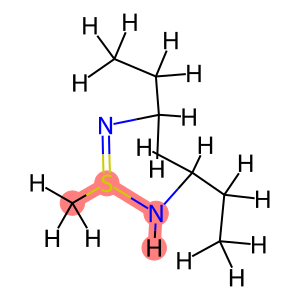

 t144j [c:1]1([H:20])[c:2]([H:21])[c:3]([C:4]([H:22])([H:23])[H:24])[c:5]([H:25])[c:6]([H:26])[c:7]1[C:8](=[O:9])[N:10](/[S:11](=[N:12]/[C:13](=[O:14])[C:15]([H:28])([H:29])[H:30])[C:16]([Cl:17])([Cl:18])[Cl:19])[H:27] (15, 10, 9, 26)


matched!


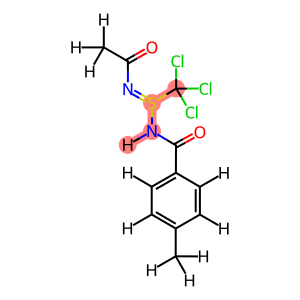

 t144j [H:28][C:1]([C:2]([C:3](/[N:4]=[S:5](\[N:6]([C:7]([C:8]([C:9]([H:27])([H:22])[H:23])([H:20])[H:21])([H:18])[H:19])[H:17])[C:10]([H:24])([H:25])[H:26])([H:15])[H:16])([H:13])[H:14])([H:11])[H:12] (9, 4, 5, 16)


matched!


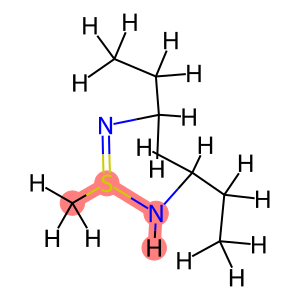

 t144j [C:1]1([H:16])=[N:2][C:3]([C:4]([C:5]([C:6](/[N:7]=[S:8](\[N:9]([C:10]([C:11]([C:12]([H:35])([H:28])[H:29])([H:26])[H:27])([H:24])[H:25])[H:23])[C:13]([H:30])([H:31])[H:32])([H:21])[H:22])([H:19])[H:20])([H:17])[H:18])=[C:14]([H:33])[N:15]1[H:34] (12, 7, 8, 22)


matched!


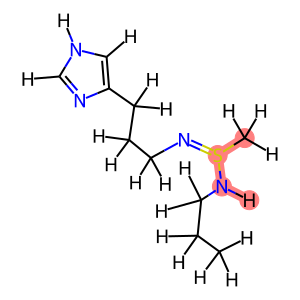

 t142j [O:1]([C@@:2]1([H:21])[C@:3]([O:4][H:23])([H:22])[C@@:5]([H:40])([H:24])[O:6][C@@:7]1([C:8]([O:9][S+:10]([C:11]([H:28])([H:29])[H:30])[C:12]([C:13]([c:14]1[c:15]([H:35])[c:16]([H:36])[c:17]([H:37])[c:18]([H:38])[c:19]1[H:39])([H:33])[H:34])([H:31])[H:32])([H:26])[H:27])[H:25])[H:20] (7, 8, 9, 10)


matched!


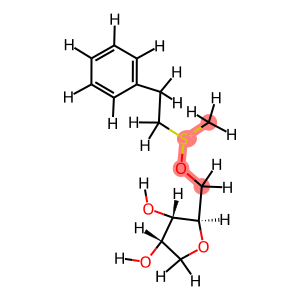

 t142j [O:1]([C@@:2]1([H:31])[C@:3]([O:4][H:33])([H:32])[C@@:5]([N:6]2[C:7]([H:35])=[N:8][c:9]3[c:10]([N:11]([H:36])[H:37])[n:12][c:13]([H:38])[n:14][c:15]32)([H:34])[O:16][C@@:17]1([C:18]([O:19][S+:20]([C:21]([H:42])([H:43])[H:44])[C:22]([C:23]([c:24]1[c:25]([H:49])[c:26]([H:50])[c:27]([H:51])[c:28]([H:52])[c:29]1[H:53])([H:47])[H:48])([H:45])[H:46])([H:40])[H:41])[H:39])[H:30] (17, 18, 19, 20)


matched!


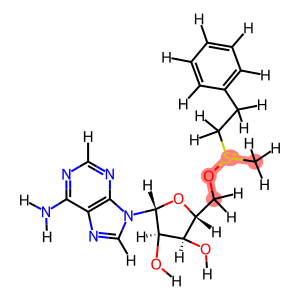

 t142j [O:1]([C@@:2]1([H:23])[C@:3]([O:4][H:25])([H:24])[C@@:5]([H:44])([H:26])[O:6][C@@:7]1([C:8]([O:9][S+:10]([C:11]([H:30])([H:31])[H:32])[C:12]([C:13]([c:14]1[c:15]([H:37])[c:16]([H:38])[c:17]([H:39])[c:18]([H:40])[c:19]1[O:20][C:21]([H:41])([H:42])[H:43])([H:35])[H:36])([H:33])[H:34])([H:28])[H:29])[H:27])[H:22] (7, 8, 9, 10)


matched!


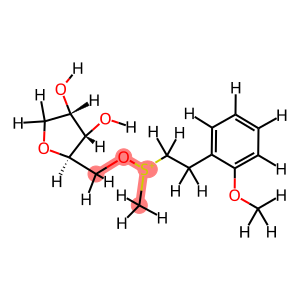

 t144j [H:28][C:1]([C:2]([C:3](/[N:4]=[S:5](\[N:6]([C:7]([C:8]([C:9]([H:27])([H:22])[H:23])([H:20])[H:21])([H:18])[H:19])[H:17])[C:10]([H:24])([H:25])[H:26])([H:15])[H:16])([H:13])[H:14])([H:11])[H:12] (6, 5, 4, 9)


['t82g', 't83g', 't80', 't80', 't80', 't80', 't17', 't17', 't17', 't45', 't45', 't86', 't86', 't1', 't1', 't1', 't80', 't45', 't45', 't1', 't4', 't4', 't18', 't70', 't4', 't4', 't154h', 't154h', 't1', 't1', 't143j', 't143j', 't118h', 't118h', 't118h', 't70', 't70', 't51', 't51', 't51', 't118h', 't118h', 't118h', 't1', 't1', 't1', 't146j', 't1', 't4', 't4', 't51', 't64', 't64', 't4', 't4', 't74g', 't74g', 't64', 't64', 't64', 't1', 't1', 't84g', 't44', 't44', 't17', 't17', 't64', 't64', 't66', 't64', 't64', 't85', 't84g', 't44', 't44', 't74g', 't44', 't44', 't44', 't44', 't85', 't44', 't44', 't44', 't44', 't74g', 't44', 't64', 't64', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't17', 't17', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't17', 't17', 't44', 't144j', 't20', 't20', 't80', 't80', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't51', 't51', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't44', 't44', 't44', 't44', 't

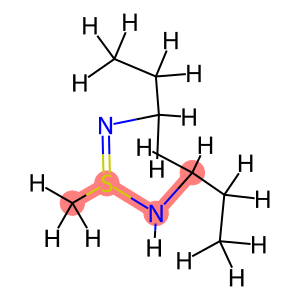

 t144j [H:28][C:1]([C:2]([C:3](/[N:4]=[S:5](\[N:6]([C:7]([C:8]([C:9]([H:27])([H:22])[H:23])([H:20])[H:21])([H:18])[H:19])[H:17])[C:10]([H:24])([H:25])[H:26])([H:15])[H:16])([H:13])[H:14])([H:11])[H:12] (6, 5, 4, 9)


['t82g', 't83g', 't80', 't80', 't80', 't80', 't17', 't17', 't17', 't45', 't45', 't86', 't86', 't1', 't1', 't1', 't80', 't45', 't45', 't1', 't4', 't4', 't18', 't70', 't4', 't4', 't154h', 't154h', 't1', 't1', 't143j', 't143j', 't118h', 't118h', 't118h', 't70', 't70', 't51', 't51', 't51', 't118h', 't118h', 't118h', 't1', 't1', 't1', 't146j', 't1', 't4', 't4', 't51', 't64', 't64', 't4', 't4', 't74g', 't74g', 't64', 't64', 't64', 't1', 't1', 't84g', 't44', 't44', 't17', 't17', 't64', 't64', 't66', 't64', 't64', 't85', 't84g', 't44', 't44', 't74g', 't44', 't44', 't44', 't44', 't85', 't44', 't44', 't44', 't44', 't74g', 't44', 't64', 't64', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't17', 't17', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't44', 't17', 't17', 't44', 't144j', 't20', 't20', 't80', 't80', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't51', 't51', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't3', 't44', 't44', 't44', 't44', 't

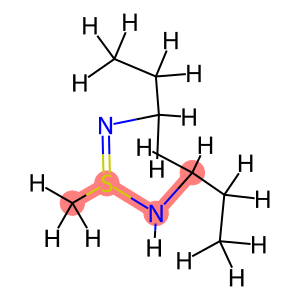

 t146j [C:1]1([H:16])=[N:2][C:3]([C:4]([C:5]([C:6](/[N:7]=[S:8](\[N:9]([C:10]([C:11]([C:12]([H:35])([H:28])[H:29])([H:26])[H:27])([H:24])[H:25])[H:23])[C:13]([H:30])([H:31])[H:32])([H:21])[H:22])([H:19])[H:20])([H:17])[H:18])=[C:14]([H:33])[N:15]1[H:34] (9, 8, 7, 12)


matched!


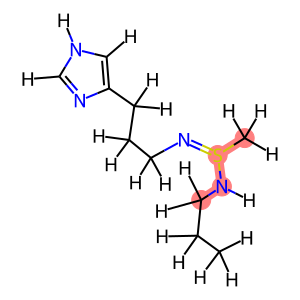

 t146j [H:28][C:1]([C:2]([C:3](/[N:4]=[S:5](\[N:6]([C:7]([C:8]([C:9]([H:27])([H:22])[H:23])([H:20])[H:21])([H:18])[H:19])[H:17])[C:10]([H:24])([H:25])[H:26])([H:15])[H:16])([H:13])[H:14])([H:11])[H:12] (6, 5, 4, 9)


matched!


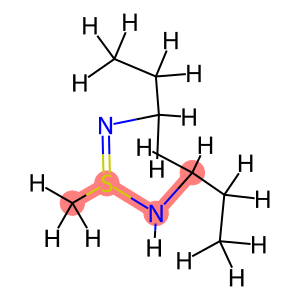

In [ ]:
import re
junk = re.compile("[(,)]")

while (line := input()) != "q":
    pid, smiles, *rest = line.split()
    tors = tuple([int(junk.sub("", x)) for x in rest])
    try:
        mol = Molecule.from_mapped_smiles(smiles, allow_undefined_stereo=True)
        labels = ff.label_molecules(mol.to_topology())[0]["ProperTorsions"]
        labels = {k: p.id for k, p in labels.items()}
        if labels[tors] == pid:
            print("matched!")
        else:
            print(pids)
        display(mol_to_svg(mol, tors))
    except Exception as e:
        print(e)

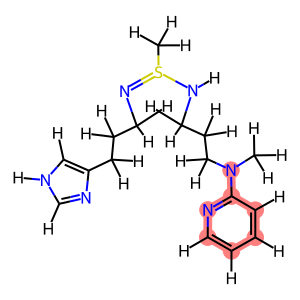

In [77]:
display(mol_to_svg(mol, [12, 13, 14, 15, 16, 17, 18]))

In [78]:
def m(s): return Molecule.from_smiles(s, allow_undefined_stereo=True)
def mm(s): return Molecule.from_mapped_smiles(s, allow_undefined_stereo=True)

/tmp/ipykernel_568151/4127025290.py:1: AtomMappingWarning: Warning! Fully mapped SMILES pattern passed to `from_smiles`. The atom map is stored as a property in `Molecule._properties`, but these indices are NOT used to determine atom ordering. To use these indices for atom ordering, use `Molecule.from_mapped_smiles`.
  def m(s): return Molecule.from_smiles(s, allow_undefined_stereo=True)


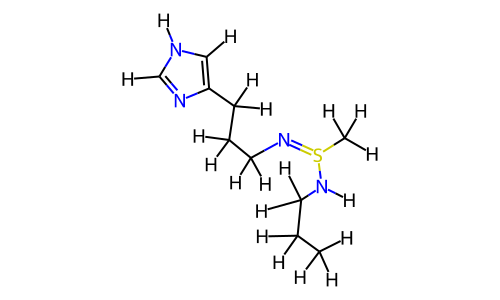

In [79]:
m("[C:1]1([H:31])=[N:2][C:3]([C:4]([C:5]([C:6](/[N:7]=[S:8](\[N:9]([C:10]([C:11]([C:12]([H:60])([H:43])[H:44])([H:41])[H:42])([H:39])[H:40])[H:38])[C:28]([H:55])([H:56])[H:57])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])=[C:29]([H:58])[N:30]1[H:59]")

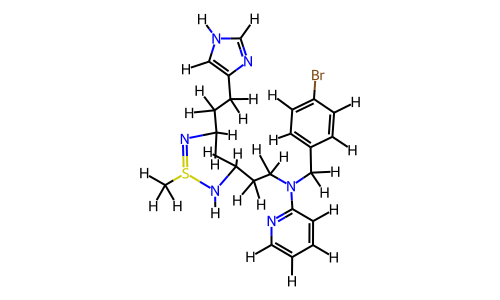

In [57]:
m("[C:1]1([H:31])=[N:2][C:3]([C:4]([C:5]([C:6](/[N:7]=[S:8](\\[N:9]([C:10]([C:11]([C:12]([N:13]([c:14]2[n:15][c:16]([H:45])[c:17]([H:46])[c:18]([H:47])[c:19]2[H:48])[C:20]([c:21]2[c:22]([H:51])[c:23]([H:52])[c:24]([Br:25])[c:26]([H:53])[c:27]2[H:54])([H:49])[H:50])([H:43])[H:44])([H:41])[H:42])([H:39])[H:40])[H:38])[C:28]([H:55])([H:56])[H:57])([H:36])[H:37])([H:34])[H:35])([H:32])[H:33])=[C:29]([H:58])[N:30]1[H:59]")

In [33]:
from copy import deepcopy

m2 = deepcopy(mol)

In [36]:
m2.atoms.pop(26)

Atom(name=, atomic number=6)

In [38]:
m2._invalidate_cached_properties()

In [43]:
mol_to_svg(m2, [])

ValueError: Atom(name=, atomic number=6) is not in list